<a href="https://colab.research.google.com/github/praveenpareek11/digital-marketing/blob/master/miq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_FInalConversions

/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_Site_BrowingBehavior

In [0]:
import pandas as pd

In [0]:
from datetime import timedelta

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

In [0]:
final_df = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_FInalConversions', delim_whitespace=True, names=('Date', 'Time', 'UserID', 'ProductID', 'Amount'))

In [5]:
final_df.head()

Date          Time  UserID ProductID  Amount
0  2017-07-26  00:00:10.465       0   A293532   52.14
1  2017-07-26  00:00:12.301       0   H209597   31.50
2  2017-07-26  00:00:12.388       0   H211370   30.48
3  2017-07-26  00:00:14.389       0   A282331   51.00
4  2017-07-26  00:00:16.837       0   H211410   16.74

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 5 columns):
Date         79795 non-null object
Time         79795 non-null object
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.0+ MB


In [7]:
final_df['Date'].unique()

array(['2017-07-26'], dtype=object)

In [8]:
final_df['DateTime'] = final_df['Date'] + ' ' + final_df['Time']
final_df.head()

Date          Time  UserID ProductID  Amount                 DateTime
0  2017-07-26  00:00:10.465       0   A293532   52.14  2017-07-26 00:00:10.465
1  2017-07-26  00:00:12.301       0   H209597   31.50  2017-07-26 00:00:12.301
2  2017-07-26  00:00:12.388       0   H211370   30.48  2017-07-26 00:00:12.388
3  2017-07-26  00:00:14.389       0   A282331   51.00  2017-07-26 00:00:14.389
4  2017-07-26  00:00:16.837       0   H211410   16.74  2017-07-26 00:00:16.837

In [0]:
final_df = final_df.drop(columns=['Date', 'Time'])

In [10]:
final_df.head()

UserID ProductID  Amount                 DateTime
0       0   A293532   52.14  2017-07-26 00:00:10.465
1       0   H209597   31.50  2017-07-26 00:00:12.301
2       0   H211370   30.48  2017-07-26 00:00:12.388
3       0   A282331   51.00  2017-07-26 00:00:14.389
4       0   H211410   16.74  2017-07-26 00:00:16.837

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
DateTime     79795 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [0]:
final_df['DateTime'] = pd.to_datetime(final_df['DateTime'])

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
DateTime     79795 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [0]:
final_df = final_df.set_index('DateTime')

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79795 entries, 2017-07-26 00:00:10.465000 to 2017-07-26 23:21:05.221000
Data columns (total 3 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [16]:
final_df.head()

UserID ProductID  Amount
DateTime                                         
2017-07-26 00:00:10.465       0   A293532   52.14
2017-07-26 00:00:12.301       0   H209597   31.50
2017-07-26 00:00:12.388       0   H211370   30.48
2017-07-26 00:00:14.389       0   A282331   51.00
2017-07-26 00:00:16.837       0   H211410   16.74

In [0]:
hourly_amount = (final_df['Amount'].groupby(final_df['Amount'].index.hour).sum()).sort_values(ascending=False)

In [18]:
hourly_amount.head()

DateTime
1     469330.16
0     425831.32
2     410735.92
3     358285.60
22    319672.62
Name: Amount, dtype: float64

In [0]:
hourly_count = (final_df['Amount'].groupby(final_df['Amount'].index.hour).count()).sort_values(ascending=False)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Text(0.5, 0, 'Hours from 0 to 23')

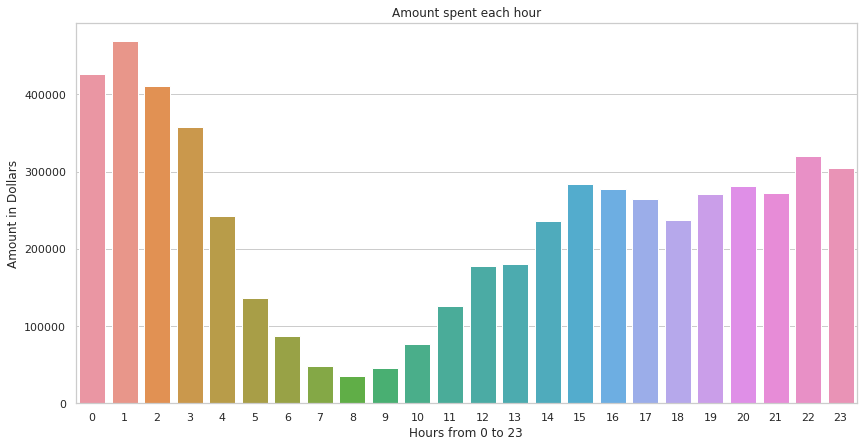

In [21]:
dims = (14,7)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_amount.index, y=hourly_amount.values, ax=ax)
ax.set_title('Amount spent each hour')
ax.set_ylabel('Amount in Dollars')
ax.set_xlabel('Hours from 0 to 23')

Text(0.5, 0, 'Hours from 0 to 23')

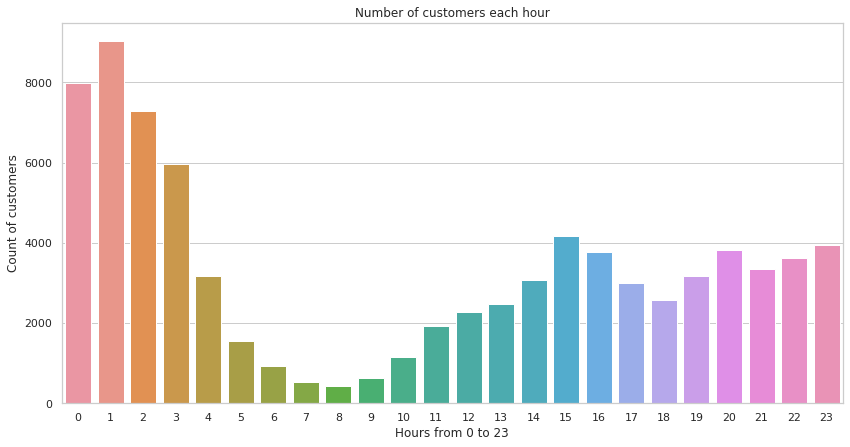

In [22]:
dims = (14,7)
fig1, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_count.index, y=hourly_count.values, ax=ax)
ax.set_title('Number of customers each hour')
ax.set_ylabel('Count of customers')
ax.set_xlabel('Hours from 0 to 23')

In [0]:
# The amount pertaining to particular product in each hour.
product_sale = final_df.groupby(['ProductID', final_df.index.hour]).sum()

In [24]:
product_sale.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25536 entries, (A00185, 2) to (V81913, 22)
Data columns (total 2 columns):
UserID    25536 non-null float64
Amount    25536 non-null float64
dtypes: float64(2)
memory usage: 576.2+ KB


In [25]:
product_sale.head()

UserID  Amount
ProductID DateTime                      
A00185    2         5.431771e+18    64.4
A00468    1         0.000000e+00    29.0
          15        6.164935e+18    32.0
          23        5.354310e+18    32.0
A00475    0         3.860802e+18    34.0

In [0]:
browsing_df = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_Site_BrowingBehavior', delim_whitespace=True, names=('Date', 'Time', 'UserID', 'Category'))

In [27]:
browsing_df.head()

Date          Time  UserID                  Category
0  2017-07-26  00:01:40.965       0                   product
1  2017-07-26  00:03:18.448       0                   product
2  2017-07-26  00:36:59.028       0                   default
3  2017-07-26  00:41:17.273       0  product-listing-category
4  2017-07-26  00:45:39.197       0                   content

In [0]:
browsing_df['DateTime'] = browsing_df['Date'] + ' ' + browsing_df['Time']

In [0]:
browsing_df = browsing_df.drop(columns=['Date', 'Time'])

In [0]:
browsing_df['DateTime'] = pd.to_datetime(browsing_df['DateTime'])

In [0]:
browsing_df = browsing_df.set_index('DateTime')

In [32]:
browsing_df.head()

UserID                  Category
DateTime                                                 
2017-07-26 00:01:40.965       0                   product
2017-07-26 00:03:18.448       0                   product
2017-07-26 00:36:59.028       0                   default
2017-07-26 00:41:17.273       0  product-listing-category
2017-07-26 00:45:39.197       0                   content

In [33]:
browsing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5535924 entries, 2017-07-26 00:01:40.965000 to 2017-07-26 23:16:32.835000
Data columns (total 2 columns):
UserID      int64
Category    object
dtypes: int64(1), object(1)
memory usage: 126.7+ MB


In [34]:
browsing_df.Category.value_counts()

product                     1855680
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
wishlist                          1
category                          1
Name: Category, dtype: int64

In [35]:
browsing_df.UserID.value_counts().head(10)

0                      1407879
3077341700699443780       3106
7190685980615725949        821
1215902060999829238        723
7188604889406730572        550
8196139059029454168        499
129240170177055445         478
3889173876144664967        429
5649288755781517931        415
3790189841148631638        412
Name: UserID, dtype: int64

In [0]:
# (browsing_df['Category'][browsing_df['UserID'] == 3077341700699443780]).groupby(by=browsing_df.index.hour)

In [0]:
unique_browsing = browsing_df.UserID.unique()

In [38]:
len(unique_browsing)

516932

In [0]:
unique_purchasing = final_df.UserID.unique()

In [40]:
len(unique_purchasing)

41009

### Top Customers contributing to 10% of total Sales

In [41]:
#Number of customers.
final_df.UserID.unique().shape

(41009,)

In [42]:
(final_df.UserID.value_counts()/sum(final_df.UserID.value_counts())*100).head(n=20).cumsum()

0                      25.311110
6999042003656970156    25.349959
559346213618742389     25.377530
9050159186422090402    25.402594
1536590739380574003    25.427658
1463071565557282392    25.450216
2837861128288012995    25.471521
365882446593357111     25.491572
4217566886697087419    25.511624
7226561847548096611    25.530422
3123669483352729646    25.547967
739440122746018130     25.565512
8516642658426997333    25.583057
2637416258977456004    25.600602
1280221762223018189    25.618147
3616389368909489793    25.635691
2886396345239507648    25.653236
6952721545686882962    25.670781
8982194330037131512    25.688326
8216918203265360218    25.704618
Name: UserID, dtype: float64

## Building Recency Feature

In [43]:
final_df.index.max()

Timestamp('2017-07-26 23:59:58.686000')

In [44]:
final_df.index.min()

Timestamp('2017-07-26 00:00:01.951000')

In [0]:
refrence_time = final_df.index.max()
refrence_time = refrence_time + timedelta(seconds = 1)

In [0]:
final_df['time_since_last_purchase'] = refrence_time - final_df.index
final_df['time_since_last_purchase_num'] = final_df['time_since_last_purchase'].astype('timedelta64[s]')

### Time period of transactions

In [47]:
customer_history_df = final_df.groupby("UserID").min().reset_index()[['UserID', 'time_since_last_purchase_num']]
customer_history_df.rename(columns={'time_since_last_purchase_num':'recency'}, inplace=True)
customer_history_df.recency.describe()

count    41009.000000
mean     43126.394767
std      29099.020683
min          1.000000
25%      16414.000000
50%      35862.000000
75%      75350.000000
max      86397.000000
Name: recency, dtype: float64

In [48]:
customer_history_df.head()

UserID  recency
0                0      1.0
1       2941287703  11895.0
2   71023925710020  43067.0
3  394529638495081  47408.0
4  430191686443660  25680.0

In [49]:
customer_history_df.recency.describe()

count    41009.000000
mean     43126.394767
std      29099.020683
min          1.000000
25%      16414.000000
50%      35862.000000
75%      75350.000000
max      86397.000000
Name: recency, dtype: float64

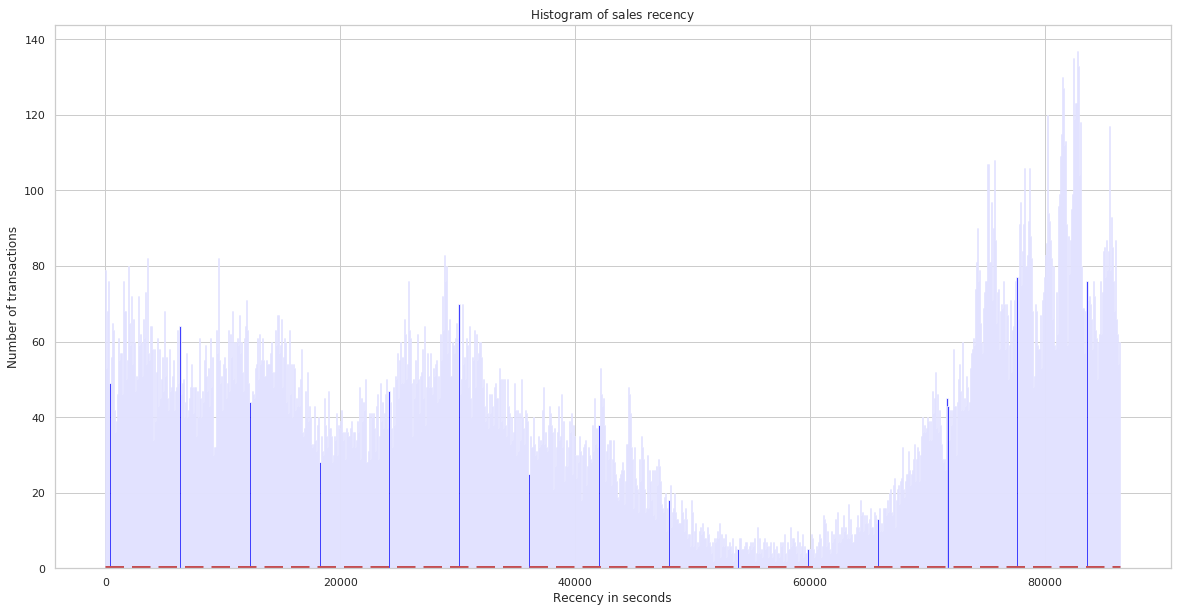

In [51]:
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 1)
x = customer_history_df.recency
mu = np.mean(customer_history_df.recency)
sigma = math.sqrt(np.var(customer_history_df.recency))
n, bins, patches = plt.hist(x, 1000, facecolor='blue', alpha=0.75)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, 'r--', lw=5)
plt.xlabel('Recency in seconds')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)

## Build Frequency & Monetary value Features

In [0]:
customer_monetary_val = final_df[['UserID', 'Amount']].groupby("UserID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val, how='outer')
customer_history_df.Amount = customer_history_df.Amount+0.001
customer_freq = final_df[['UserID', 'Amount']].groupby("UserID").count().reset_index()
customer_freq.rename(columns={'Amount':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq, how='outer')

In [53]:
customer_history_df = customer_history_df.drop(0)
customer_history_df.head()

UserID  recency  Amount  frequency
1       2941287703  11895.0  75.341          1
2   71023925710020  43067.0  89.961          1
3  394529638495081  47408.0  94.341          1
4  430191686443660  25680.0  84.701          2
5  887103105578626  85471.0  52.141          1

In [54]:
from sklearn import preprocessing
from math import log

customer_history_df['recency_log'] = np.log(customer_history_df['recency'])
customer_history_df['frequency_log'] = np.log(customer_history_df['frequency'])
customer_history_df['amount_log'] = np.log(customer_history_df['Amount'])
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector].as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Visualizing Recency vs Monetary Value (scaled)

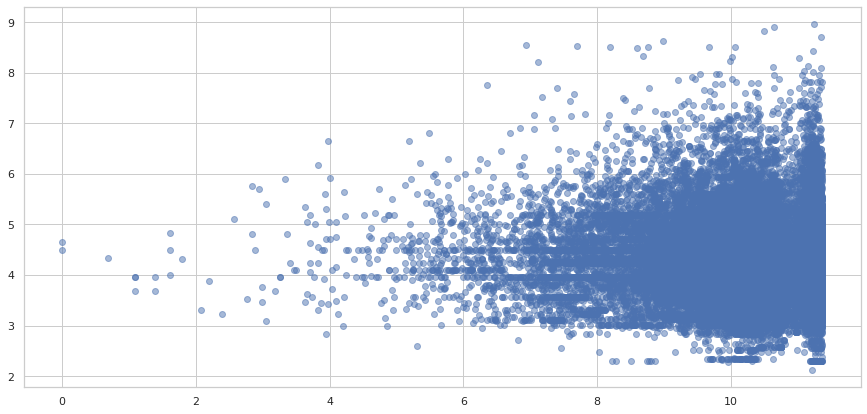

In [56]:
plt.scatter(customer_history_df.recency_log, customer_history_df.amount_log, alpha=0.5)

## Visualizing Monetary Value distribution (scaled)

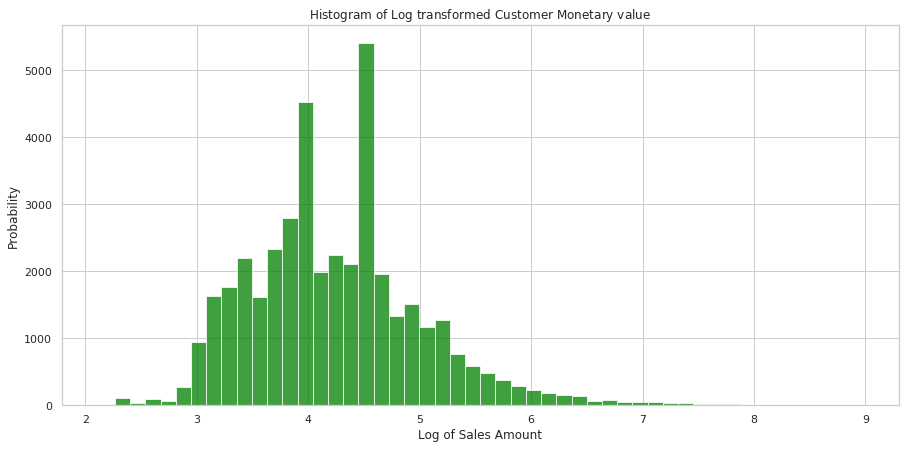

In [59]:
plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots(1, 1)

x = customer_history_df.amount_log
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)

plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Customer\ Monetary\ value}\ $')
plt.grid(True)
#plt.show()

In [60]:
customer_history_df.head()

UserID  recency  Amount  ...  recency_log  frequency_log  amount_log
1       2941287703  11895.0  75.341  ...     9.383873       0.000000    4.322024
2   71023925710020  43067.0  89.961  ...    10.670512       0.000000    4.499376
3  394529638495081  47408.0  94.341  ...    10.766546       0.000000    4.546916
4  430191686443660  25680.0  84.701  ...    10.153468       0.693147    4.439127
5  887103105578626  85471.0  52.141  ...    11.355932       0.000000    3.953952

[5 rows x 7 columns]

Text(0.5, 0, 'Monetary')

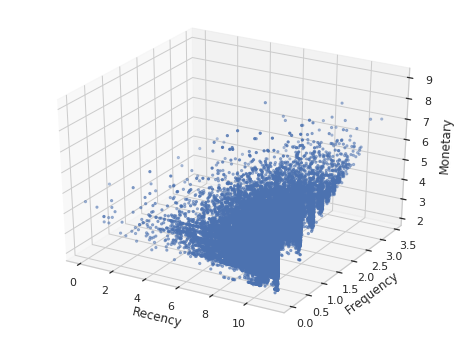

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

#plt.show()

## Analyze Customer Segments with Clustering

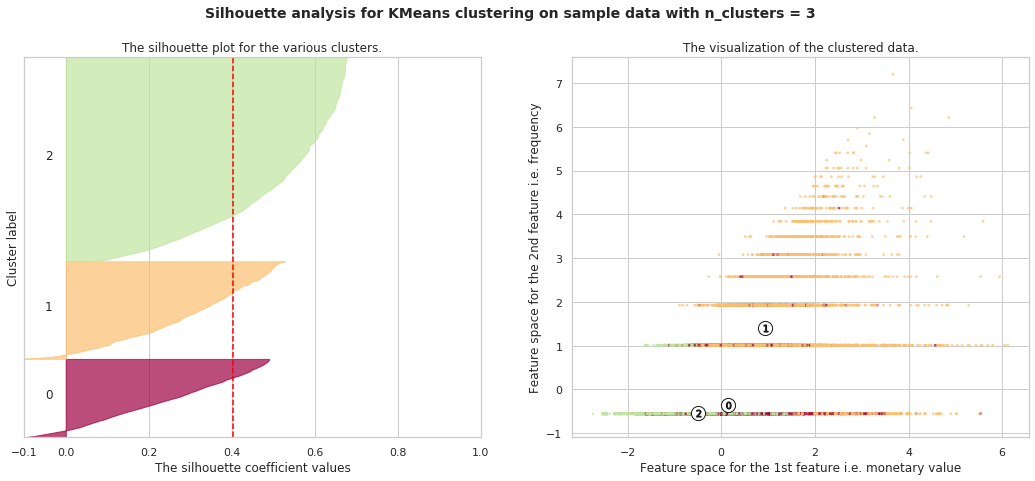

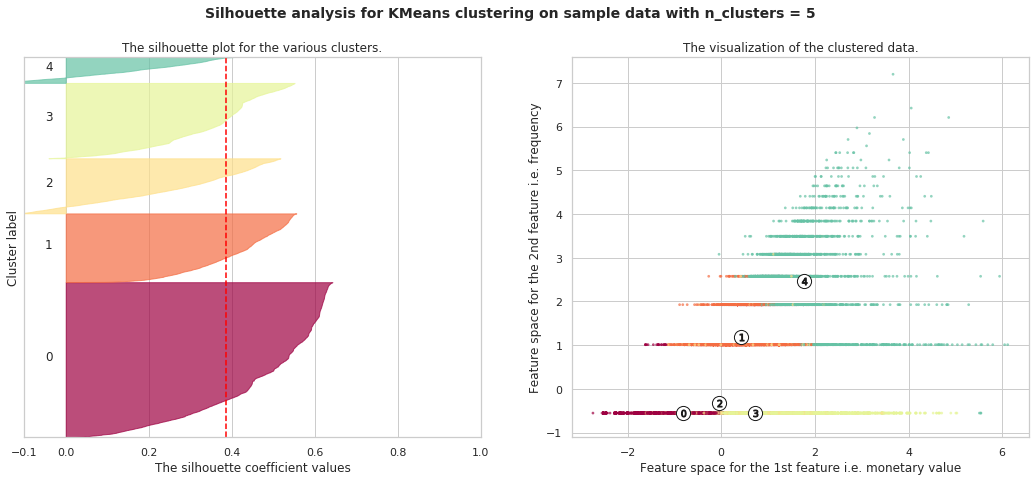

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

In [64]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
   amount_log   recency_log  frequency_log
0   77.555679   5297.899701       1.092003
1  143.308914  40144.280050       2.386940
2   47.065952  46399.039060       1.006685
Silhouette score for cluster 3 is 0.40343916093994936

for 5 number of clusters
   amount_log   recency_log  frequency_log
0   36.775573  46488.852524       1.000871
1   96.388785  43424.672712       2.155425
2   66.956930   3601.573258       1.103509
3  121.874130  33075.398664       1.000000
4  271.887833  28166.353597       3.810617
Silhouette score for cluster 5 is 0.3865993188918734



## Assign Cluster Labels

In [0]:
labels = cluster_centers[5]['labels']   
customer_history_df['num_cluster5_labels'] = labels
labels = cluster_centers[3]['labels']
customer_history_df['num_cluster3_labels'] = labels

In [66]:
customer_history_df.head()

UserID  recency  ...  num_cluster5_labels  num_cluster3_labels
1       2941287703  11895.0  ...                    2                    0
2   71023925710020  43067.0  ...                    3                    2
3  394529638495081  47408.0  ...                    3                    2
4  430191686443660  25680.0  ...                    1                    1
5  887103105578626  85471.0  ...                    0                    2

[5 rows x 9 columns]

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Visualize Segments

In [75]:
configure_plotly_browser_state()

import plotly as py
import plotly.graph_objs as go
# py.offline.init_notebook_mode()

x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 100
field_to_plot = 'recency'

y0 = customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    autosize=False,
    width=1200,
    height=500,
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)
# py.offline.iplot(fig)

In [77]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'Amount'
y0 = customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)


In [81]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'frequency'
y0 = customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)

In [82]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 100
field_to_plot = 'recency'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)

In [84]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 80
field_to_plot = 'Amount'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(        
        dtick=1000,
    )
)

go.Figure(data=traces, layout=layout)

In [85]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 90
field_to_plot = 'frequency'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)